<a href="https://colab.research.google.com/github/bryaanabraham/Deep-Fake-AI/blob/main/Weights_deduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from google.colab import drive

Mounted at /content/drive


Some Drawbacks:
- Requires a suspect for weight calculations
- Generalization might be subjective

# Data Loading

In [3]:
drive.mount('/content/drive')
fake_frames_dir = '/content/drive/MyDrive/Frames/frames_fake'
original_frames_dir = '/content/drive/MyDrive/Frames/frames_original'

In [4]:
def get_image_files(directory, extension="jpg"):
  image_files = []
  pattern = os.path.join(directory, f"*.{extension}")
  image_files.extend(glob.glob(pattern))
  return image_files

In [5]:
fake_images = get_image_files(fake_frames_dir)
original_images = get_image_files(original_frames_dir)

In [6]:
fake_images.sort()
original_images.sort()

# Logic used:
- difference in pixel's RGB values are used to to determine a weight matrix
- The weight matrix is then used to perform calculation of original image

In [49]:
fake_image = Image.open(fake_images[0])
fake_image_array = np.array(fake_image)
df_fake = pd.DataFrame(fake_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

original_image = Image.open(original_images[0])
original_image_array = np.array(original_image)
df_original = pd.DataFrame(original_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

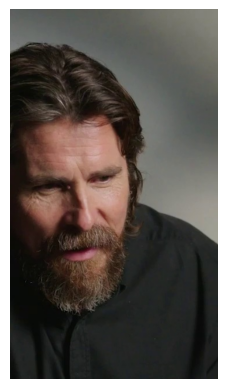

In [50]:
plt.imshow(original_image_array)
plt.axis('off')
plt.show()

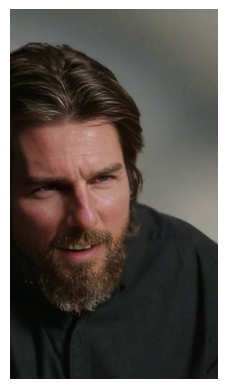

In [51]:
plt.imshow(fake_image_array)
plt.axis('off')
plt.show()

In [52]:
df_difference = (df_original - df_fake)
weight_array = df_difference.to_numpy().reshape(640, 360, 3).astype(np.uint8)
reversed_array = fake_image_array + weight_array

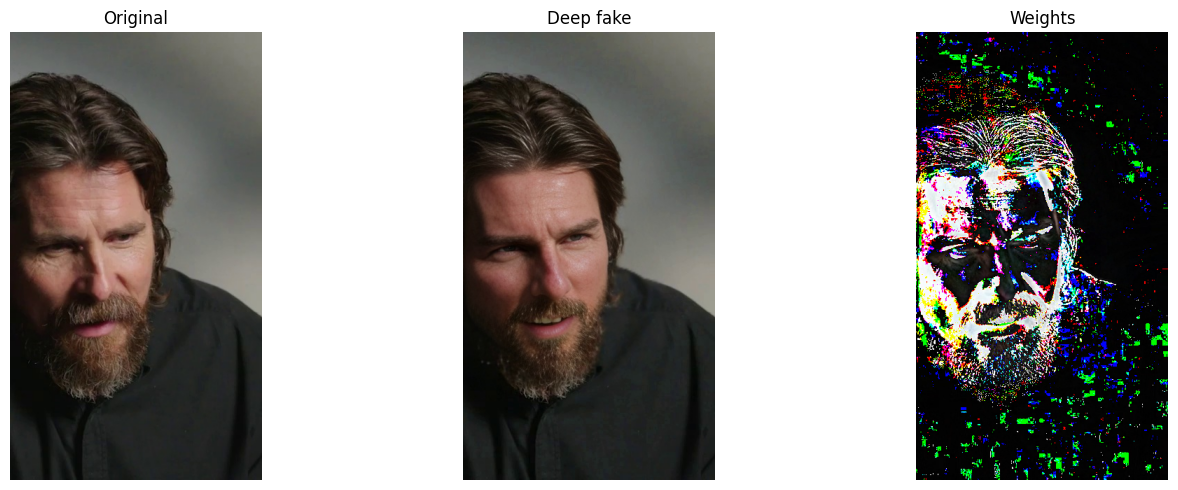

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
captions = ['Original', 'Deep fake', 'Weights']

axes[0].imshow(original_image_array)
axes[0].set_title(captions[0])
axes[0].axis('off')

axes[1].imshow(fake_image_array)
axes[1].set_title(captions[1])
axes[1].axis('off')

axes[2].imshow(weight_array)
axes[2].set_title(captions[2])
axes[2].axis('off')

plt.tight_layout()
plt.show()

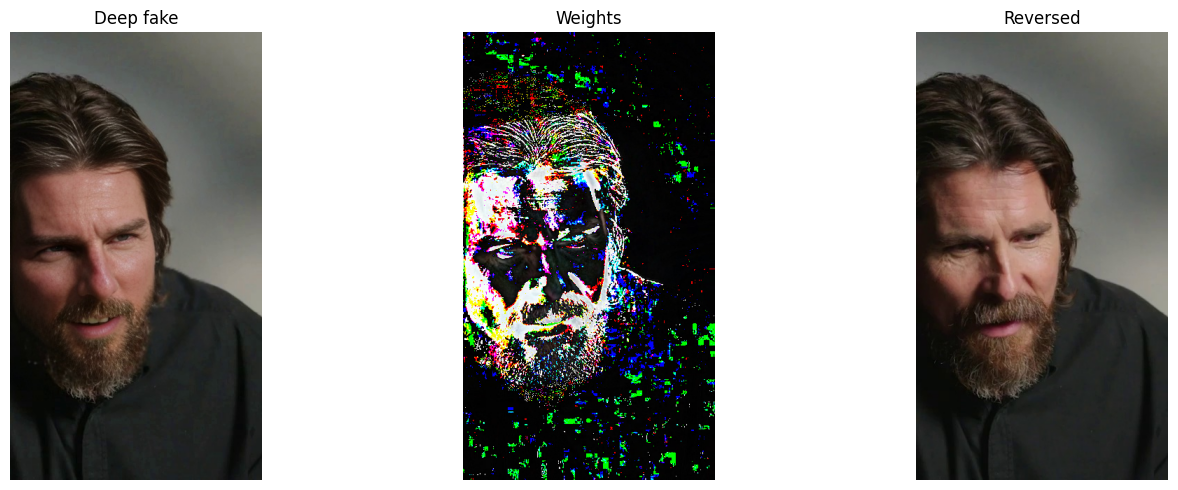

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
captions = ['Deep fake','Weights', 'Reversed']

axes[0].imshow(fake_image_array)
axes[0].set_title(captions[0])
axes[0].axis('off')

axes[1].imshow(weight_array)
axes[1].set_title(captions[1])
axes[1].axis('off')

axes[2].imshow(reversed_array)
axes[2].set_title(captions[2])
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Generalization
- The above logic was implemented for a single image
- a generalized weight matrix needs to be calculated which is applicable to all frames

In [54]:
original_image = Image.open(original_images[0])
original_image_array = np.array(original_image)

In [55]:
fake_image = Image.open(fake_images[0])
fake_image_array = np.array(fake_image)

In [57]:
fake_image = Image.open(fake_images[0])
fake_image_array = np.array(fake_image)
df_fake = pd.DataFrame(fake_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

original_image = Image.open(original_images[0])
original_image_array = np.array(original_image)
df_original = pd.DataFrame(original_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

for i in range(1,len(fake_images)):
    fake_image = Image.open(fake_images[i])
    fake_image_array = np.array(fake_image)
    df_fake_temp = pd.DataFrame(fake_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])
    df_fake += df_fake_temp

    original_image = Image.open(original_images[i])
    original_image_array = np.array(original_image)
    df_original_temp = pd.DataFrame(original_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])
    df_original += df_original_temp

df_difference = (df_original - df_fake) / len(fake_images)

In [61]:
weight_array = df_difference.to_numpy().reshape(640, 360, 3).astype(np.uint8)

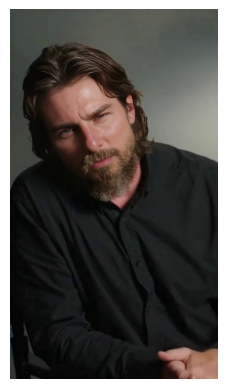

In [58]:
plt.imshow(fake_image_array)
plt.axis('off')
plt.show()

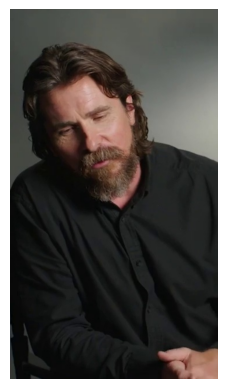

In [59]:
plt.imshow(original_image_array)
plt.axis('off')
plt.show()

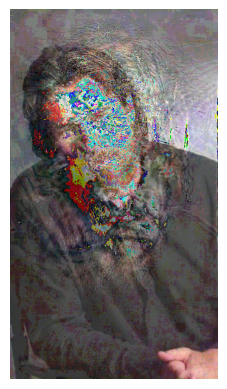

In [63]:
reversed_array = fake_image_array + weight_array*25
plt.imshow(reversed_array)
plt.axis('off')
plt.show()